## 参考
[matplotlib.pyplot.bar](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.bar.html)

[並列表示の棒グラフ](https://stats.biopapyrus.jp/python/barplot.html)


[Matplotlib returning a plot object](https://stackoverflow.com/questions/43925337/matplotlib-returning-a-plot-object)

In [1]:
import openpyxl

wb = openpyxl.load_workbook('図表作成用ファイル.xlsx')
sheet = wb['棒グラフ']

name1 = sheet['A3'].value[1:-1]
name2 = sheet['A4'].value[1:-1]

## 棒グラフ

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
range1 = sheet1['B3:E4']
range2 = sheet1['H3:K4']
range3 = sheet1['N3:Q4']

In [10]:
def plot_signal(range_n, fig_=fig):
    values = [cell.value for cell in np.array(range_n).T.flatten()]
    x = [name1, name2]
    x_position = np.arange(len(x))
    y1 = values[:2]
    y2 = values[2:4]
    y1_err = values[4:6]
    y2_err = values[6:8]

    ax = fig_.add_subplot(1, 1, 1)
    ax.bar(x_position, y1, width=0.35, label='+P', 
           color='#b8dbb9',edgecolor='black', yerr=y1_err, capsize=5)
    ax.bar(x_position + 0.4, y2, width=0.35, label='-P',
           color='#3f6b40',edgecolor='black', yerr=y2_err, capsize=5)
    ax.set_xlabel('Genotype', fontsize=18)
    ax.set_ylabel('Average lateral root weight (mg ${plant}^{-1}$)', fontsize=18)
    ax.legend()
    ax.set_xticks(x_position + 0.2)
    ax.set_xticklabels(x)
    ax.tick_params(labelsize=14)
    return fig_

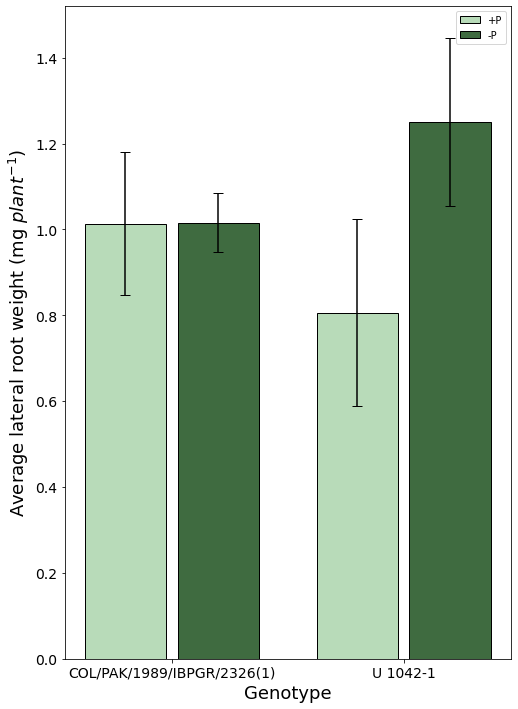

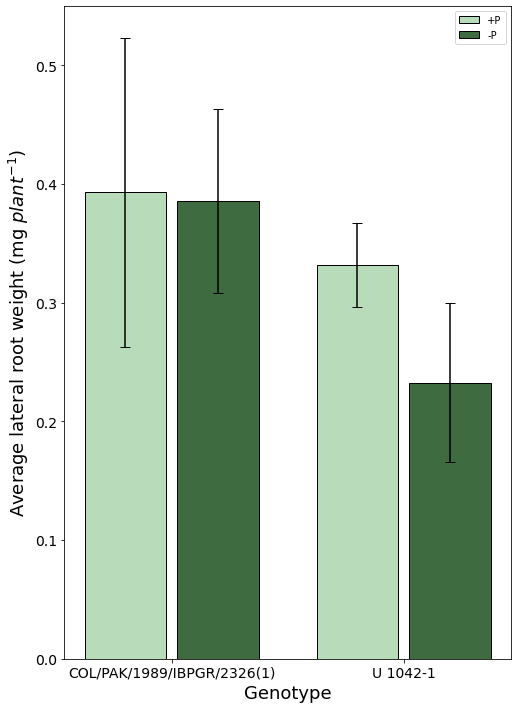

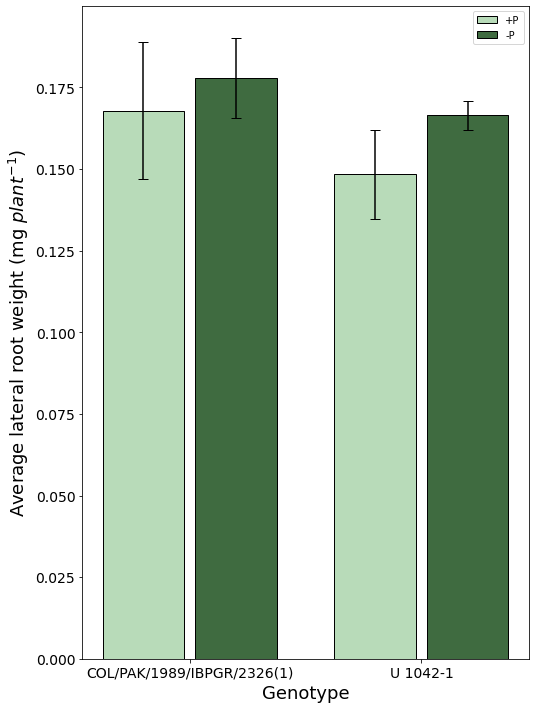

In [11]:
for range_ in [range1, range2, range3]:
    fig = plt.figure(figsize=(8,12))
    fig = plot_signal(range_, fig_=fig)
    fig